In [1]:
import pandas as pd

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from plotnine import *

### Get IC50s for all neut runs for each cohort
For 0-5yo sera, data was consolidated from a large number of runs. I manually generated a finalized dataframe of the single best run available for all sera screened from this cohort.

In [2]:
data_ped = pd.read_csv('neut_data/230309_consolidated_neuts_5yo.csv')

print(f'\n0-5yo sera screened: {len(data_ped["serum"].unique())}\n')


0-5yo sera screened: 82



In [3]:
# Fit with neutcurve
fits = neutcurve.CurveFits(data_ped)

# Get IC50s df and add age group
ic50s_ped = fits.fitParams(ics=[50])
ic50s_ped['age_group'] = '0-5'

For teenagers, all sera were initially screened in a single run.

In [4]:
data_teens = pd.read_csv('neut_data/230303_neuts_tidy.csv')

print(f'\n15-20yo sera screened: {len(data_teens["serum"].unique())}\n')


15-20yo sera screened: 32



In [5]:
fits = neutcurve.CurveFits(data_teens)

# Get IC50s df and add age group
ic50s_teens = fits.fitParams(ics=[50])
ic50s_teens['age_group'] = '15-20'

Adults were also all screened in a single run.

In [6]:
data_adults = pd.read_csv('neut_data/230417_adult-neuts_tidy_edited.csv')

print(f'\n40-45yo sera screened: {len(data_adults["serum"].unique())}\n')


40-45yo sera screened: 30



In [7]:
fits = neutcurve.CurveFits(data_adults)

# Get IC50s df and add age group
ic50s_adults = fits.fitParams(ics=[50])
ic50s_adults['age_group'] = '40-45'

### Consolidate all IC50 data and plot

In [8]:
# concat to a single df
ic50s = pd.concat([ic50s_ped, ic50s_teens, ic50s_adults])

# make serum datatype consistent
ic50s['serum'] = ic50s['serum'].astype(str)

# calculate reciprocal IC50
ic50s['reciprocal'] = ic50s.apply(lambda x: 1/(x['ic50']), axis=1)

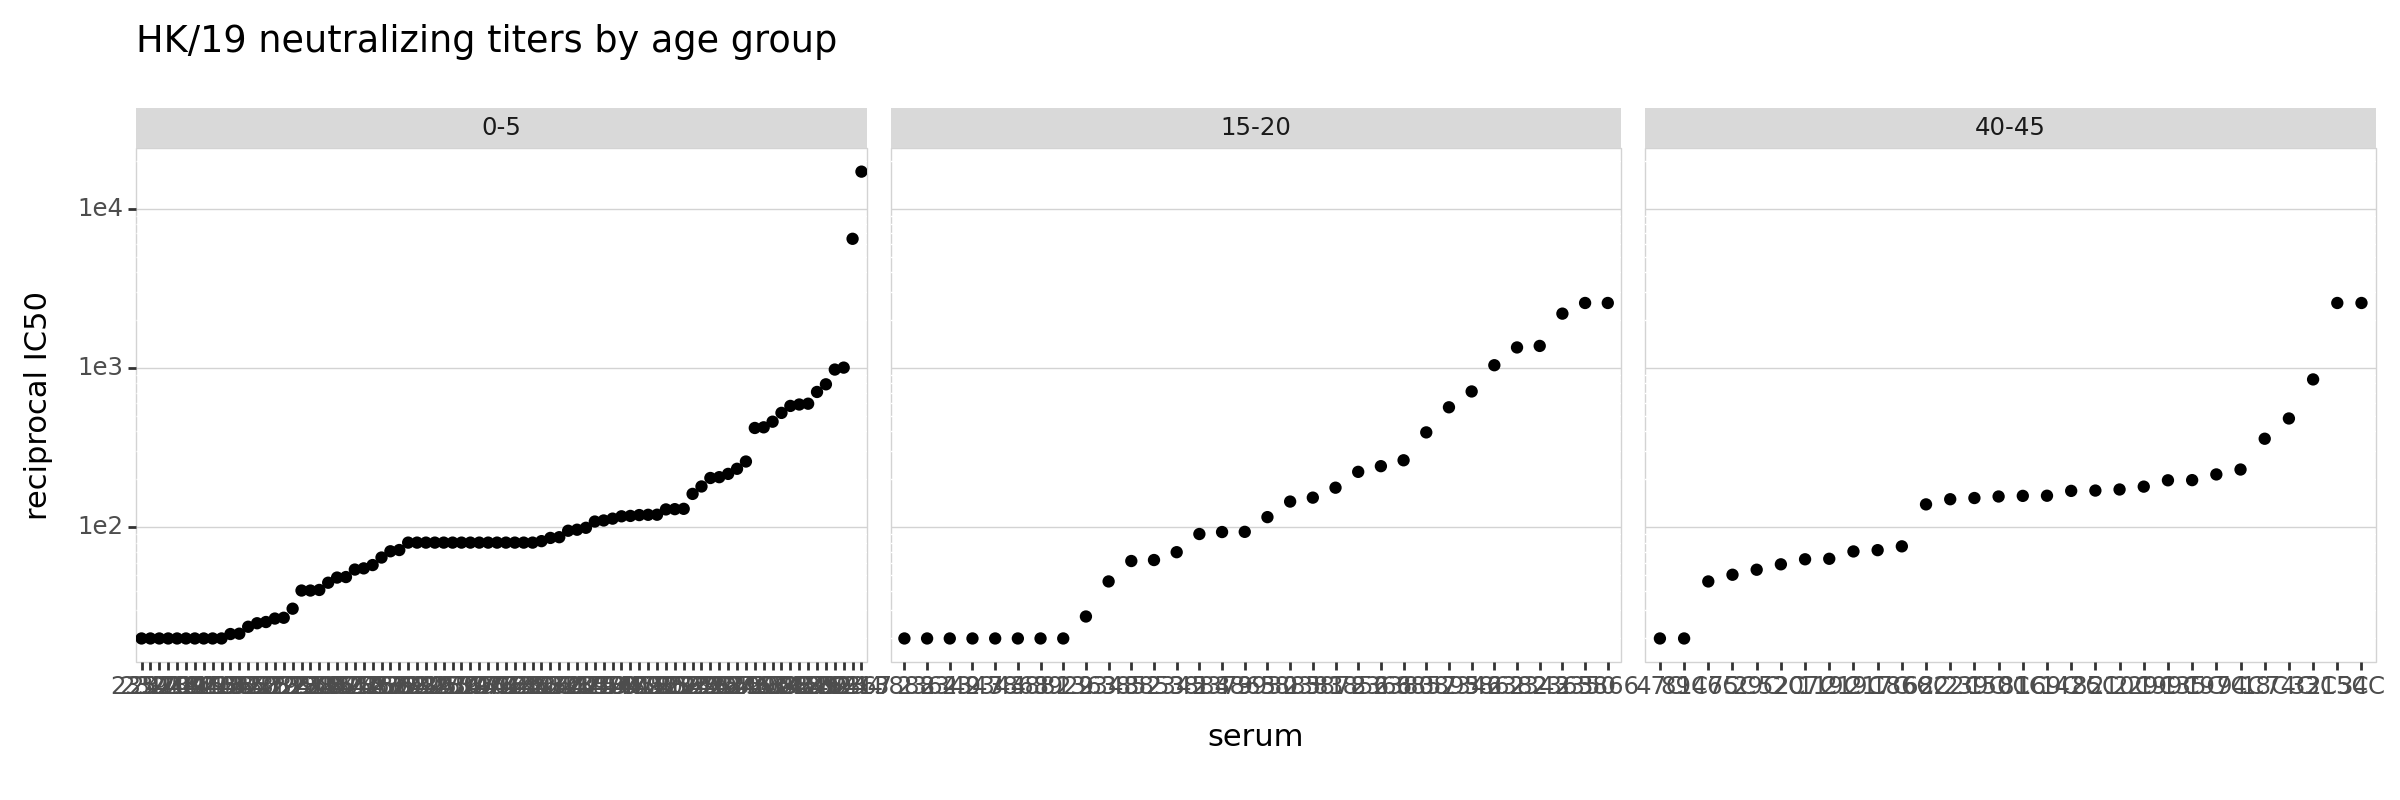

In [9]:
p = (
    ggplot(
        data=ic50s,
        mapping=aes(x='reorder(serum, reciprocal)', y='reciprocal')) +
    geom_point() +
    theme(
        figure_size=(12, 4),
        panel_grid_major_x=element_blank(),
        panel_background=element_rect(fill='white', color='gray'),  # Set background color to white and add gray border
        panel_grid_major_y=element_line(color='lightgray', size=0.5),  # Set y lines to light gray
        panel_border=element_rect(color='lightgray', size=0.5),  # Make panel borders match y lines
    ) +
    scale_y_log10() +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='serum',
         y='reciprocal IC50', title='HK/19 neutralizing titers by age group')
)

p = p + facet_wrap('~ age_group', nrow=1, scales='free_x')
p.draw()

In [10]:
p.save('figures/screening_IC50s.pdf')